In [4]:
# 📘 01: Import Required Libraries

import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 📘 02: Load the cleaned dataset from the desktop
file_path = r"C:\Users\Otala\Desktop\cleaned_numeric_combined.csv"
df = pd.read_csv(file_path)

print(f"✅ Loaded data with shape: {df.shape}")
df.head()  # Display the first few rows

✅ Loaded data with shape: (2829385, 78)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


In [11]:
# 📘 03: Scale features (Isolation Forest works better with normalized data)
import numpy as np
from sklearn.preprocessing import StandardScaler

# Step 1: Replace inf/-inf with NaN (no inplace)
df = df.replace([np.inf, -np.inf], np.nan)

# Step 2: Drop all rows with NaN values
df = df.dropna()

# Step 3: Scale
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.values)

print("✅ Data cleaned and scaled successfully.")


✅ Data cleaned and scaled successfully.


In [13]:
# 📘 04: Train Isolation Forest
from sklearn.ensemble import IsolationForest

# Train the model
model = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)

# Predict anomalies
df['anomaly'] = model.fit_predict(scaled_features)

# Map prediction output to labels
df['anomaly'] = df['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

print(df['anomaly'].value_counts())


anomaly
Normal     2771612
Anomaly      56264
Name: count, dtype: int64


C:\Users\Otala\AppData\Local\Temp\ipykernel_17196\3640123990.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='anomaly', data=df, palette='Set2')


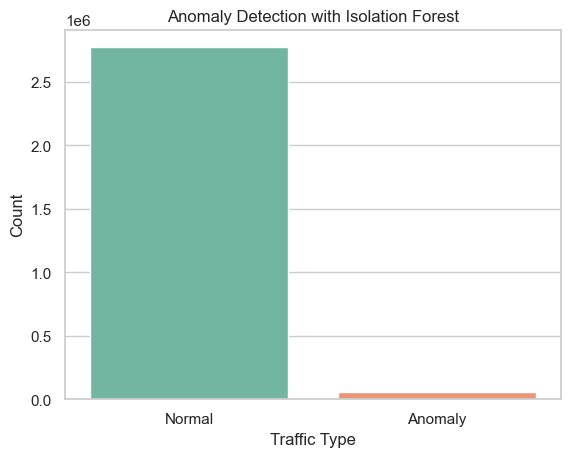

anomaly
Normal     2771612
Anomaly      56264
Name: count, dtype: int64

In [14]:
# 📘 05: Plot Normal vs Anomaly distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.countplot(x='anomaly', data=df, palette='Set2')
plt.title("Anomaly Detection with Isolation Forest")
plt.xlabel("Traffic Type")
plt.ylabel("Count")
plt.show()

# Display count
df['anomaly'].value_counts()


In [15]:
# 📘 Cell 6: Export anomalies for Little’s Theorem or reporting
# 📦 Filter anomalies and save to CSV
anomalies = df[df['anomaly'] == 'Anomaly']
anomalies.to_csv(r"C:\Users\Otala\Desktop\anomalies_only.csv", index=False)

print(f"✅ Saved {len(anomalies)} anomalies to your Desktop as 'anomalies_only.csv'")


✅ Saved 56264 anomalies to your Desktop as 'anomalies_only.csv'
